# NCHS - Leading Causes of Death: United States

(see http://data.cdc.gov) | Last Updated 2019-04-23T13:40:17.000Z

This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates previously published. Causes of death classified by the International Classification of Diseases, Tenth Revision (ICD–10) are ranked according to the number of deaths assigned to rankable causes. Cause of death statistics are based on the underlying cause of death. SOURCES CDC/NCHS, National Vital Statistics System, mortality data (see http://www.cdc.gov/nchs/deaths.htm); and CDC WONDER (see http://wonder.cdc.gov). REFERENCES 1. National Center for Health Statistics. Vital statistics data available. Mortality multiple cause files. Hyattsville, MD: National Center for Health Statistics. Available from: https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm. 2. Murphy SL, Xu JQ, Kochanek KD, Curtin SC, and Arias E. Deaths: Final data for 2015. National vital statistics reports; vol 66. no. 6. Hyattsville, MD: National Center for Health Statistics. 2017. Available from: https://www.cdc.gov/nchs/data/nvsr/nvsr66/nvsr66_06.pdf.

In [45]:
import json
from urllib.request import urlopen
import requests
import sys, os
import matplotlib.pyplot as plt

import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df

def parse_data(url):
    """
    :param url: str
    :return: dict
    """
    try:
        # Load the first sheet of the JSON file into a data frame
        data = pd.read_json(url, orient='columns')
        df = pd.DataFrame(data)
        return df
    except IOError:
        print("\n Error loading JSON URL.")
        sys.exit()


In [5]:
url = 'https://data.cdc.gov/resource/bi63-dtpu.json' 
        
# Dataframe
df = parse_data(url)

# View the first ten rows
df.head(10)

,_113_cause_name,aadr,cause_name,deaths,state,year
0,"Nephritis, nephrotic syndrome and nephrosis (N...",2.6,Kidney disease,21,Vermont,2012
1,"Nephritis, nephrotic syndrome and nephrosis (N...",3.7,Kidney disease,30,Vermont,2016
2,"Nephritis, nephrotic syndrome and nephrosis (N...",3.8,Kidney disease,30,Vermont,2013
3,"Intentional self-harm (suicide) (*U03,X60-X84,...",3.8,Suicide,23,District of Columbia,2000
4,"Nephritis, nephrotic syndrome and nephrosis (N...",4.1,Kidney disease,325,Arizona,2014
5,"Intentional self-harm (suicide) (*U03,X60-X84,...",4.4,Suicide,29,District of Columbia,2009
6,"Nephritis, nephrotic syndrome and nephrosis (N...",4.5,Kidney disease,49,South Dakota,2011
7,"Nephritis, nephrotic syndrome and nephrosis (N...",4.5,Kidney disease,39,Vermont,2015
8,"Nephritis, nephrotic syndrome and nephrosis (N...",4.5,Kidney disease,37,Vermont,2014
9,"Nephritis, nephrotic syndrome and nephrosis (N...",4.9,Kidney disease,374,Arizona,2013


In [7]:
# Show columns
print(df.columns.values)

['_113_cause_name' 'aadr' 'cause_name' 'deaths' 'state' 'year']


In [10]:
df.count()

_113_cause_name    1000
aadr               1000
cause_name         1000
deaths             1000
state              1000
year               1000
dtype: int64

In [174]:
print("Min:", df.aadr.min())
print("Max:", df.aadr.max())

Min: 2.6
Max: 12.7


In [89]:
print("Min:", df.year.min())
print("Max:", df.year.max())

Min: 1999
Max: 2016


In [180]:
#df.sort_values(['deaths']).groupby('state')['deaths'].count()
#df.sort_values(['deaths'],ascending=False).groupby('state').head(3)

#df.groupby(['state']).agg({'deaths':sum})
df.groupby(["state"])["deaths"].sum()

state
Alabama                   4954
Alaska                     876
Arizona                  14717
Arkansas                   336
California              113498
Colorado                 10632
Connecticut              11253
Delaware                  1997
District of Columbia      1656
Florida                  84085
Georgia                  16433
Hawaii                    6445
Idaho                     3246
Illinois                 21118
Indiana                   7515
Iowa                      9724
Kansas                    1254
Kentucky                   965
Louisiana                 7797
Maine                     2406
Maryland                 16856
Massachusetts             9251
Michigan                 15704
Minnesota                23405
Mississippi               2660
Missouri                  4213
Montana                   2172
Nebraska                  6301
Nevada                     940
New Hampshire             4220
New Jersey               21205
New Mexico                2324
Ne

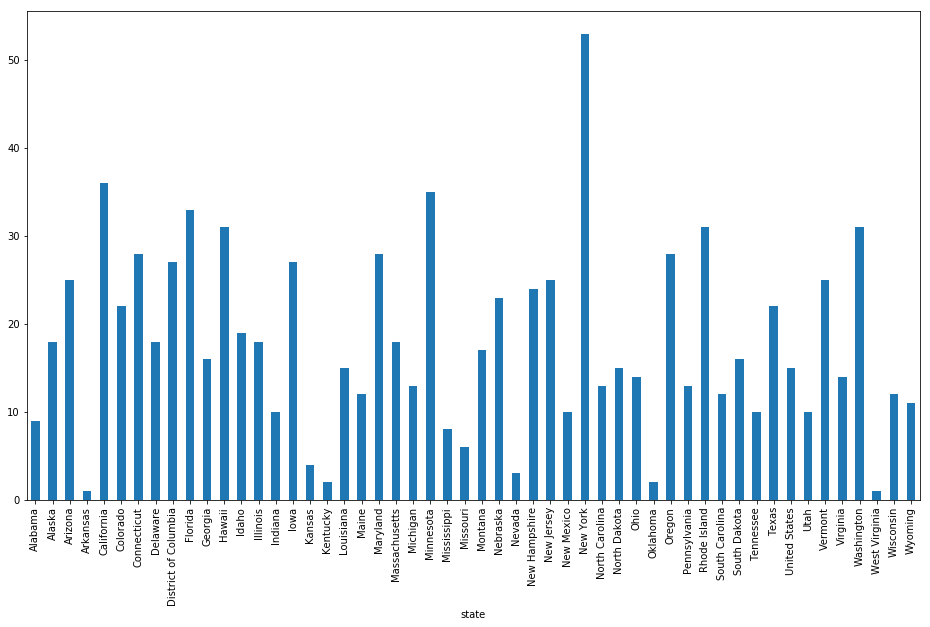

In [168]:
df.groupby('state')['deaths'].nunique().plot(kind='bar')
plt.rcParams["figure.figsize"] = [16,9] # adjust fig size
plt.show()

In [23]:
df.groupby(['cause_name']).sum()['deaths']

cause_name
Alzheimer's disease         40515
Diabetes                      350
Influenza and pneumonia     83245
Kidney disease             227393
Suicide                    886919
Name: deaths, dtype: int64

In [22]:
df.groupby(['cause_name', 'year']).sum()['deaths']

cause_name               year
Alzheimer's disease      1999     3033
                         2000     1657
                         2001     1827
                         2002     1944
                         2003     2027
                         2004     2160
                         2005     2065
                         2006     2021
                         2007     1999
                         2008     2303
                         2009     2396
                         2010     2805
                         2011     2760
                         2012     2889
                         2013     2816
                         2014     2639
                         2015     3174
Diabetes                 2014      350
Influenza and pneumonia  2004      824
                         2005     2846
                         2006     3683
                         2007     4455
                         2008     4407
                         2009     4705
                         2010     

In [27]:
df.groupby('state').sum()['deaths']

state
Alabama                   4954
Alaska                     876
Arizona                  14717
Arkansas                   336
California              113498
Colorado                 10632
Connecticut              11253
Delaware                  1997
District of Columbia      1656
Florida                  84085
Georgia                  16433
Hawaii                    6445
Idaho                     3246
Illinois                 21118
Indiana                   7515
Iowa                      9724
Kansas                    1254
Kentucky                   965
Louisiana                 7797
Maine                     2406
Maryland                 16856
Massachusetts             9251
Michigan                 15704
Minnesota                23405
Mississippi               2660
Missouri                  4213
Montana                   2172
Nebraska                  6301
Nevada                     940
New Hampshire             4220
New Jersey               21205
New Mexico                2324
Ne

In [218]:
df.groupby('year').count()[['deaths']]
# or df['year'].value_counts()

,deaths
year,
1999,71
2000,60
2001,55
2002,57
2003,55
2004,56
2005,56
2006,57
2007,55


In [172]:
df.groupby(['state', 'year']).agg({'deaths': 'sum'})

deaths
state         year        
Alabama       1999     555
              2001     512
              2002     514
              2003     521
              2004     541
              2005     535
              2006     580
              2007     592
              2008     604
Alaska        1999      24
              2000      30
              2001      24
              2002      21
              2003      28
              2004      23
              2005      82
              2007      40
              2009      98
              2011     111
              2012      96
              2013      49
              2014      45
              2015      91
              2016     114
Arizona       1999     544
              2000     614
              2001     644
              2002     622
              2003     563
              2004     634
...                    ...
Washington    2012    1210
              2013    1229
              2014    1210
              2015    1325
              2016    1347
West Virginia 1999     229
Wisconsin     1999    1270
              2000     590
              2001     639
              2002     627
              2003     647
              2004     662
              2005     643
              2006     670
              2009     724
              2012     723
              2016     888
Wyoming       1999      30
              2000      45
              2001      54
              2002      43
              2003      57
              2004      45
              2006      58
              2008      56
              2010      69
              2012      72
              2013      56
              2014      78
              2016      66

[711 rows x 1 columns]

In [216]:
df.groupby(['state', 'cause_name']).agg('deaths').count()

state                 cause_name             
Alabama               Suicide                     9
Alaska                Alzheimer's disease         1
                      Influenza and pneumonia     6
                      Kidney disease             14
Arizona               Influenza and pneumonia     7
                      Kidney disease             18
Arkansas              Suicide                     1
California            Kidney disease             18
                      Suicide                    18
Colorado              Influenza and pneumonia     5
                      Kidney disease             18
Connecticut           Alzheimer's disease         1
                      Influenza and pneumonia     4
                      Kidney disease              5
                      Suicide                    18
Delaware              Influenza and pneumonia     3
                      Kidney disease              1
                      Suicide                    15
District of Columb

In [245]:
df.query("state == 'Alaska' ").groupby(['year', 'cause_name']).agg('deaths').sum()
#df.groupby(['state', 'cause_name']).agg('deaths').count()

year  cause_name             
1999  Alzheimer's disease        24
2000  Kidney disease             30
2001  Kidney disease             24
2002  Kidney disease             21
2003  Kidney disease             28
2004  Kidney disease             23
2005  Influenza and pneumonia    44
      Kidney disease             38
2007  Kidney disease             40
2009  Influenza and pneumonia    51
      Kidney disease             47
2011  Influenza and pneumonia    58
      Kidney disease             53
2012  Influenza and pneumonia    52
      Kidney disease             44
2013  Kidney disease             49
2014  Kidney disease             45
2015  Influenza and pneumonia    41
      Kidney disease             50
2016  Influenza and pneumonia    61
      Kidney disease             53
Name: deaths, dtype: int64

In [251]:
df.query("state == 'Alaska' ")

,_113_cause_name,aadr,cause_name,deaths,state,year
82,"Nephritis, nephrotic syndrome and nephrosis (N...",6.8,Kidney disease,21,Alaska,2002
103,"Nephritis, nephrotic syndrome and nephrosis (N...",7.1,Kidney disease,23,Alaska,2004
109,"Nephritis, nephrotic syndrome and nephrosis (N...",7.2,Kidney disease,24,Alaska,2001
212,Influenza and pneumonia (J09-J18),8.4,Influenza and pneumonia,41,Alaska,2015
214,"Nephritis, nephrotic syndrome and nephrosis (N...",8.4,Kidney disease,28,Alaska,2003
338,"Nephritis, nephrotic syndrome and nephrosis (N...",9.5,Kidney disease,44,Alaska,2012
404,Influenza and pneumonia (J09-J18),10.0,Influenza and pneumonia,52,Alaska,2012
409,"Nephritis, nephrotic syndrome and nephrosis (N...",10.0,Kidney disease,53,Alaska,2016
410,"Nephritis, nephrotic syndrome and nephrosis (N...",10.0,Kidney disease,50,Alaska,2015
421,"Nephritis, nephrotic syndrome and nephrosis (N...",10.1,Kidney disease,45,Alaska,2014
